In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('extracted_dataset.csv')
df

,Course Code,Course Title,Student Number,Department Code,Course Level,Letter Grade,Status,GPA,Standing,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Semester,Theoritical,Practical,Course Credit,ECTS,Course Year
0,UNI 123,Textual Analysis and Effective Communication,351,IE,Undergraduate,A+,Successful,4.05,Freshman,18,30,4.050000,2.120833,2.703226,2010 - Fall,3,0,3,5,1
1,MGT 511,Küresel Yönetim Düşüncesi,1182,MBA/NT,Graduate,A-,Successful,3.54,Freshman,15,25,3.540000,3.576471,3.324211,2010 - Fall,3,0,3,5,5
2,MGT 521,Yönetim ve Organizasyon,1182,MBA/NT,Graduate,B+,Successful,3.54,Freshman,15,25,3.540000,3.371429,3.324211,2010 - Fall,3,0,3,5,5
3,MGT 521,Yönetim ve Organizasyon,1181,MBA/NT,Graduate,B+,Successful,3.38,Freshman,15,25,3.380000,3.371429,3.324211,2010 - Fall,3,0,3,5,5
4,MGT 531,Stratejik Yönetim,1181,MBA/NT,Graduate,B+,Successful,3.38,Freshman,15,25,3.380000,3.227273,3.324211,2010 - Fall,3,0,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,IE 451,Project Management,2003,EE,Undergraduate,B+,Successful,2.52,Junior,18,30,3.300000,2.673585,2.496850,2014 - Spring,3,0,3,5,4
49343,ENGR 251,Probability for Engineers,1311,EE,Undergraduate,A-,Successful,2.14,Sophomore,15,25,3.000000,2.206105,1.990188,2014 - Spring,3,0,3,5,2
49344,EE 321,Electromagnetics,2003,EE,Undergraduate,B,Successful,2.52,Junior,18,30,2.540000,2.278049,2.476489,2014 - Spring,3,0,3,5,3
49345,CTV 212,Editing,173,CTV,Undergraduate,C+,Successful,2.08,Sophomore,18,30,2.488889,2.693056,2.924132,2014 - Spring,3,0,3,5,2


         Semester  Letter Grade
0     2010 - Fall           322
1   2010 - Spring           424
2   2010 - Summer            48
3     2011 - Fall          1442
4   2011 - Spring          1813
5   2011 - Summer           213
6     2012 - Fall          3675
7   2012 - Spring          4278
8   2012 - Summer           374
9     2013 - Fall          6813
10  2013 - Spring          7737
11  2013 - Summer           735
12    2014 - Fall         10604
13  2014 - Spring         10869


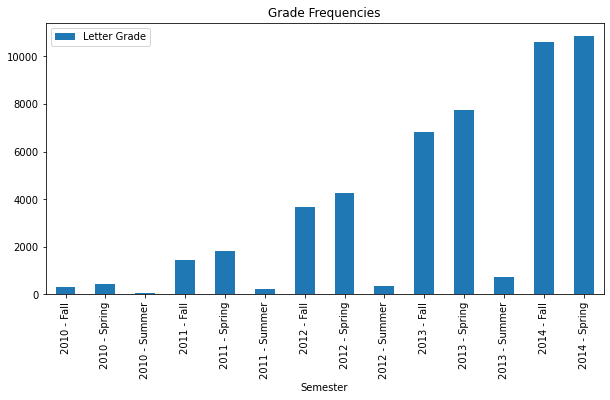

In [5]:
grade_dist = df[['Semester', 'Letter Grade']].groupby(['Semester'], as_index=False).count()
print(grade_dist)
grade_dist.plot('Semester', 'Letter Grade', 'bar', title='Grade Frequencies', figsize=(10,5))

There are 14 semesters available in the dataset. Since there are only 8 semesters available in standard undergraduate programs, we consider 8 semesters and add previous semesters' data to the next highest one.

Details:

* 2010 - Fall, Spring and Summer are added to 2011 - Fall
* 2011 - Summer is added to 2012 - Fall
* 2012 - Summer is added to 2013 - Fall
* 2013 - Summer is added to 2014 - Fall

In [7]:
for row_idx in df.index:
    semester = df.iloc[row_idx, 14]
    
    if '2010' in semester:
        df.iloc[row_idx, 14] = '2011 - Fall'
    elif semester == '2011 - Summer':
        df.iloc[row_idx, 14] = '2012 - Fall'
    elif semester == '2012 - Summer':
        df.iloc[row_idx, 14] = '2013 - Fall'
    elif semester == '2013 - Summer':
        df.iloc[row_idx, 14] = '2014 - Fall'

        Semester  Letter Grade
0    2011 - Fall          2236
1  2011 - Spring          1813
2    2012 - Fall          3888
3  2012 - Spring          4278
4    2013 - Fall          7187
5  2013 - Spring          7737
6    2014 - Fall         11339
7  2014 - Spring         10869


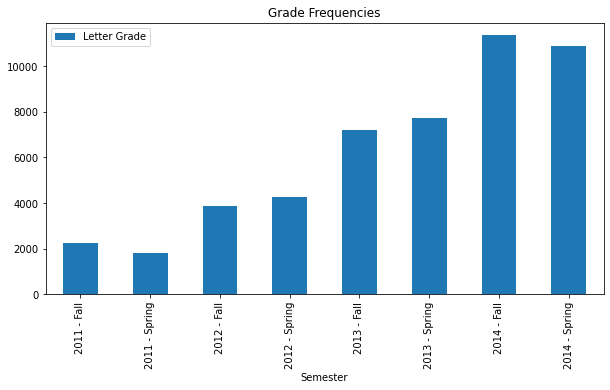

In [8]:
grade_dist = df[['Semester', 'Letter Grade']].groupby(['Semester'], as_index=False).count()
print(grade_dist)
grade_dist.plot('Semester', 'Letter Grade', 'bar', title='Grade Frequencies', figsize=(10,5))

In [9]:
df.to_csv('processed_dataset.csv', index=False)